In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
student_routine= {
    'course':np.random.choice(['Engineering','Education','Nursing','Psychology'],100),
    'hours_studied':np.round(np.random.normal(12,5,100),2),
    'sleep_hours':np.round(np.random.normal(8,5,100),2),
    'exam_score':np.round(np.random.uniform(50,100,100),2),
}

df=pd.DataFrame(student_routine)
df.to_csv('hours_studied_data.csv',index=False)

In [9]:
df=pd.read_csv('hours_studied_data.csv')
print("Original Data Shape:",df.shape)

Original Data Shape: (100, 4)


In [10]:
df.loc[np.random.choice(df.index,10),'hours_studied']=np.nan
df.loc[np.random.choice(df.index,5),'sleep_hours']=np.nan

In [11]:
df.to_csv('hours_studied_data_miss.csv',index=False)

In [13]:
df=pd.read_csv('hours_studied_data_miss.csv')
print("Original Data Shape:",df.shape)
df['hours_studied']=df['hours_studied'].fillna(df['hours_studied'].mean())
df=df.dropna(subset=['sleep_hours'])
print("Cleaned Data Shape:",df.shape)
df.to_csv('hours_studied_data_cleac.csv',index=False)

Original Data Shape: (100, 4)
Cleaned Data Shape: (95, 4)


In [14]:
#Numpy
hours_studied=df['hours_studied'].to_numpy()
sleep_hours=df['sleep_hours'].to_numpy()
correlation=np.corrcoef(hours_studied,sleep_hours)[0,1]
print(f"Correlation between hours studied and sleep hours:{correlation:.2f}")

Correlation between hours studied and sleep hours:0.16


In [16]:
#Scipy
Engineering_hours_studied=df[df['course']=='Engineering']['hours_studied']
Nursing_hours_studied=df[df['course']=='Nursing']['hours_studied']
t_stat,p_value=stats.ttest_ind(Engineering_hours_studied,Nursing_hours_studied)
print(f"T-test between Engineering and Nursing hours studied:t={t_stat:.2f},p={p_value:3f}")

T-test between Engineering and Nursing hours studied:t=1.55,p=0.128264


In [17]:
 #Statsmodels
X=sm.add_constant(df['sleep_hours'])
model=sm.OLS(df['hours_studied'],X).fit()
print("\nlinear Regression Summary:")
print(model.summary())


linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:          hours_studied   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.357
Date:                Thu, 08 May 2025   Prob (F-statistic):              0.128
Time:                        15:08:01   Log-Likelihood:                -294.45
No. Observations:                  95   AIC:                             592.9
Df Residuals:                      93   BIC:                             598.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.7039

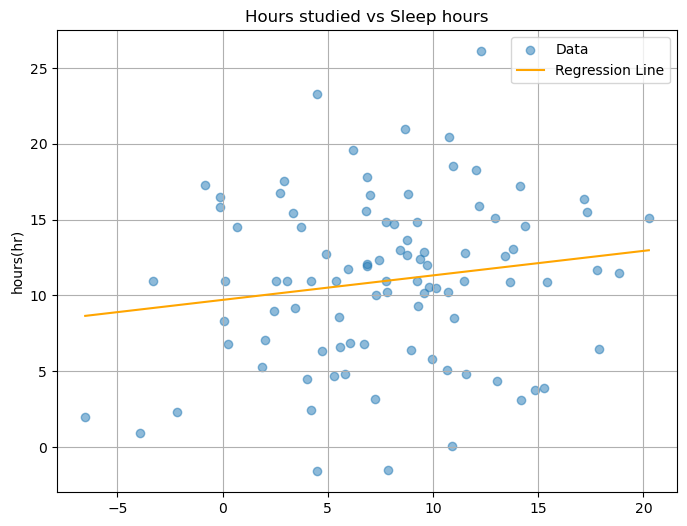

In [20]:
#Visualisation(Linear Registration) via Matplotlib
plt.figure(figsize=(8,6))
plt.scatter(df['sleep_hours'],df['hours_studied'],alpha=0.5,label='Data')
x_range=np.linspace(df['sleep_hours'].min(),df['sleep_hours'].max(),100)
y_pred=model.params.iloc[0]+model.params.iloc[1]*x_range
plt.plot(x_range,y_pred,color='orange',label='Regression Line')
plt.title('Hours studied vs Sleep hours')
plt.ylabel('hours(hr)')
plt.legend()
plt.grid(True)
plt.show()

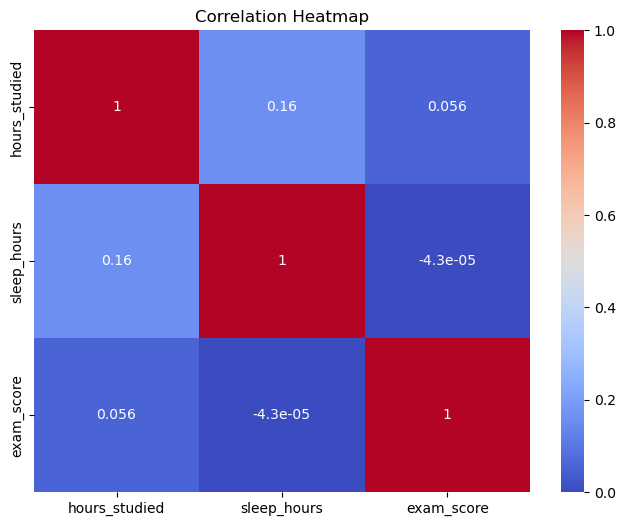

In [23]:
#Statistical visualisation(Boslot?Heatmap) via Seaborn
plt.figure(figsize=(8,6))
sns.boxplot(x='hours_studied',y='exam_score',data=df)
plt.title('Effect of Hours studied by Exam score')
plt.savefig('hours_studied_by_exam_score.png')
plt.close()
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()